In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#loading the data
from sklearn.datasets import load_breast_cancer

In [ ]:
# saving the data
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
#targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33,random_state =42)

In [ ]:
N,D = X_train.shape


In [ ]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#build the model
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

In [ ]:
#loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
#convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [ ]:
# train the model
n_epochs =1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the gradient
  optimizer.zero_grad()

  #forward pass
  outputs = model(X_train)
  loss = criterion(outputs,y_train)
  with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy()== p_train)
    
 

  #backward and optimize
  loss.backward()
  optimizer.step()

  #get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test,y_test)

  #save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it+1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss :{loss_test.item():.4f},train acc :{train_acc}")




Epoch 50/1000, Train Loss: 0.3320, Test Loss :0.3193,train acc :0.9448818897637795
Epoch 100/1000, Train Loss: 0.2570, Test Loss :0.2498,train acc :0.952755905511811
Epoch 150/1000, Train Loss: 0.2147, Test Loss :0.2092,train acc :0.963254593175853
Epoch 200/1000, Train Loss: 0.1874, Test Loss :0.1819,train acc :0.9606299212598425
Epoch 250/1000, Train Loss: 0.1682, Test Loss :0.1622,train acc :0.968503937007874
Epoch 300/1000, Train Loss: 0.1541, Test Loss :0.1473,train acc :0.968503937007874
Epoch 350/1000, Train Loss: 0.1431, Test Loss :0.1356,train acc :0.973753280839895
Epoch 400/1000, Train Loss: 0.1344, Test Loss :0.1262,train acc :0.9763779527559056
Epoch 450/1000, Train Loss: 0.1272, Test Loss :0.1184,train acc :0.9763779527559056
Epoch 500/1000, Train Loss: 0.1212, Test Loss :0.1119,train acc :0.9763779527559056
Epoch 550/1000, Train Loss: 0.1161, Test Loss :0.1063,train acc :0.9763779527559056
Epoch 600/1000, Train Loss: 0.1117, Test Loss :0.1015,train acc :0.979002624671916

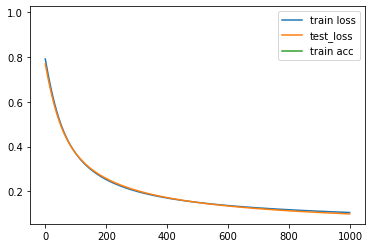

In [ ]:
# ploting the train and test loss per iteration
plt.plot(train_losses,label = 'train loss')
plt.plot(test_losses,label='test_loss')
plt.plot(train_acc,label = 'train acc')
plt.legend()
plt.show()

In [ ]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy()== p_train)
  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
  print(f"train acc: {train_acc:.4f},Test acc: {test_acc:.4f}")

train acc: 0.9816,Test acc: 0.9840


In [ ]:
# saving and loading the model
model.state_dict() 


OrderedDict([('0.weight',
              tensor([[-0.4559, -0.5305, -0.4813, -0.3094, -0.2112, -0.0878, -0.4644, -0.4557,
                       -0.1335,  0.4935, -0.5391,  0.0715, -0.4708, -0.2647, -0.0878,  0.1723,
                       -0.0486, -0.2416,  0.2316,  0.6382, -0.3410, -0.5120, -0.3386, -0.4184,
                       -0.3926, -0.1644, -0.2659, -0.4790, -0.3985, -0.4227]])),
             ('0.bias', tensor([0.5045]))])

In [ ]:
torch.save(model.state_dict(),'mymodel.pt')


In [ ]:
#loaading the model
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy()== p_train)
  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
  print(f"train acc: {train_acc:.4f},Test acc: {test_acc:.4f}")

train acc: 0.9843,Test acc: 0.9894
